# Federal University of Ceará
# Teleinformatics Departament
# Graduate Program in Teleinformatics Engeneering
## TIP8419 - Tensor Algebra
## Homework 0 - Hadamard, Kronecker and Khatri-Rao Products
### Function testing and simulation results

- Ezequias Márcio - 497779

To run this notebook properly, it is necessary Python3 installed alongside alongside with the packages listed below:

- `numpy 1.17.2`
- `tensorly 0.4.5`
- `matplotlib 3.1.1`
- `seaborn 0.9.0`
- `tdqm 4.36.1`

Make sure that the file `tensoralg.py` is in the same directory as this notebook.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensoralg # Module created for this hw
from tensorly.tenalg import khatri_rao
from time import perf_counter_ns
from tqdm import tqdm
sns.set_style("whitegrid")
np.set_printoptions(3, linewidth=175)

In [11]:
# Number of rows/columns:
n = np.array([2,4,8,16,32,64,128])
realiz = 100
# Variables to store the time values:
dt_hadamard = np.zeros((realiz, n.size))
dt_kron = np.zeros((realiz, n.size))
dt_khatri = np.zeros((realiz, n.size))

dt_my_hadamard = np.zeros((realiz, n.size))
dt_my_kron = np.zeros((realiz, n.size))
dt_my_khatri = np.zeros((realiz, n.size))

### Testing functions

In [12]:
# Matrices for testing:
M, N = 3, 2
A = np.random.rand(M, 2*N).view(np.complex_)
B = np.random.rand(M, 2*N).view(np.complex_)
print(f'''A
{A, A.shape}
B
{B, B.shape}
''')
# Hadamard product:
my_hadamard = tensoralg.hd_product(A,B)
hadamard = A*B

# Kronecker product:
my_kronecker = tensoralg.kron(A,B)
kronecker = np.kron(A,B)

# Khatri-Rao Product:
my_khatri = tensoralg.kr(A, B) 
khatri = khatri_rao([A,B])

print(f'''Hadamard - test: {np.allclose(my_hadamard, hadamard)} 

impelmented:
{my_hadamard, my_hadamard.shape}

python:
{hadamard, hadamard.shape}

Kronecker - test: {np.allclose(my_kronecker, kronecker)}

impelmented:
{my_kronecker, my_kronecker.shape}

python:
{kronecker, kronecker.shape}

Khatri-Rao - test: {np.allclose(my_khatri, khatri)}

impelmented:
{my_khatri, my_khatri.shape}

python:
{khatri, khatri.shape}
''')

A
(array([[0.732+0.196j, 0.232+0.384j],
       [0.101+0.258j, 0.445+0.344j],
       [0.059+0.638j, 0.911+0.634j]]), (3, 2))
B
(array([[0.858+0.594j, 0.918+0.244j],
       [0.092+0.249j, 0.421+0.803j],
       [0.362+0.979j, 0.082+0.127j]]), (3, 2))

Hadamard - test: True 

impelmented:
(array([[ 0.512+0.602j,  0.12 +0.409j],
       [-0.055+0.049j, -0.089+0.502j],
       [-0.603+0.289j, -0.006+0.167j]]), (3, 2))

python:
(array([[ 0.512+0.602j,  0.12 +0.409j],
       [-0.055+0.049j, -0.089+0.502j],
       [-0.603+0.289j, -0.006+0.167j]]), (3, 2))

Kronecker - test: True

impelmented:
(array([[ 0.512+0.602j,  0.624+0.358j, -0.029+0.467j,  0.12 +0.409j],
       [ 0.018+0.2j  ,  0.151+0.67j , -0.074+0.093j, -0.211+0.348j],
       [ 0.073+0.787j,  0.035+0.109j, -0.292+0.367j, -0.03 +0.061j],
       [-0.066+0.281j,  0.03 +0.261j,  0.178+0.559j,  0.325+0.424j],
       [-0.055+0.049j, -0.164+0.19j , -0.045+0.142j, -0.089+0.502j],
       [-0.216+0.192j, -0.024+0.034j, -0.176+0.56j , -0.007+0.084

### Performance simulations

In [20]:
# Mean over 100 realizations:
for r in tqdm(range(realiz)):
    for idx, val in enumerate(n):
        # Generating N x N matrices:
        A = np.random.rand(val, 2*val).view(np.complex_)
        B = np.random.rand(val, 2*val).view(np.complex_)
    
        # Hadamard:
        ti = perf_counter_ns()
        A*B  # measuring the execution time
        tf = perf_counter_ns()
        dt_hadamard[r, idx] = tf - ti

        ti = perf_counter_ns()
        tensoralg.hd_product(A, B) # measuring the execution time
        tf = perf_counter_ns()
        dt_my_hadamard[r, idx] = tf - ti
    
        # Kronecker:
        ti = perf_counter_ns()
        np.kron(A, B) # measuring the execution time
        tf = perf_counter_ns()
        dt_kron[r, idx] = tf - ti 
    
        ti = perf_counter_ns()
        tensoralg.kron(A, B) # measuring the execution time
        tf = perf_counter_ns()
        dt_my_kron[r, idx] = tf - ti

        # Khatri-Rao
        ti = perf_counter_ns() 
        khatri_rao([A, B]) # measuring the execution time
        tf = perf_counter_ns()
        dt_khatri[r, idx] = tf - ti

        ti = perf_counter_ns()
        tensoralg.kr(A, B) # measuring the execution time
        tf = perf_counter_ns()
        dt_my_khatri[r, idx] = tf - ti

100%|██████████| 100/100 [07:33<00:00,  4.53s/it]


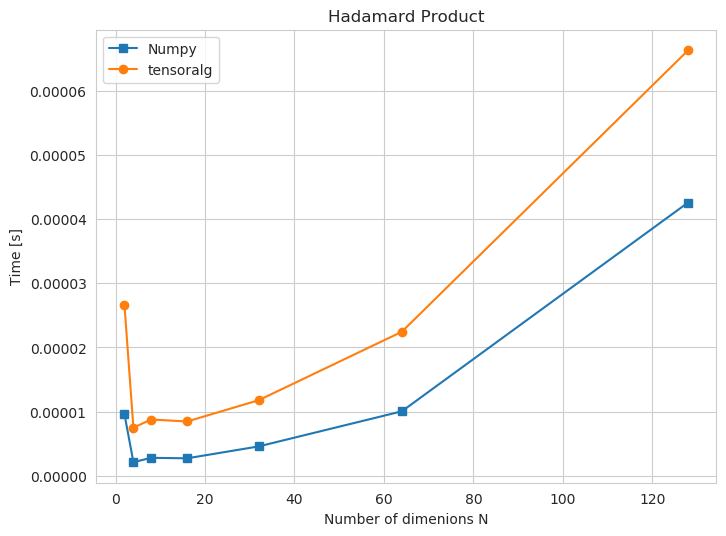

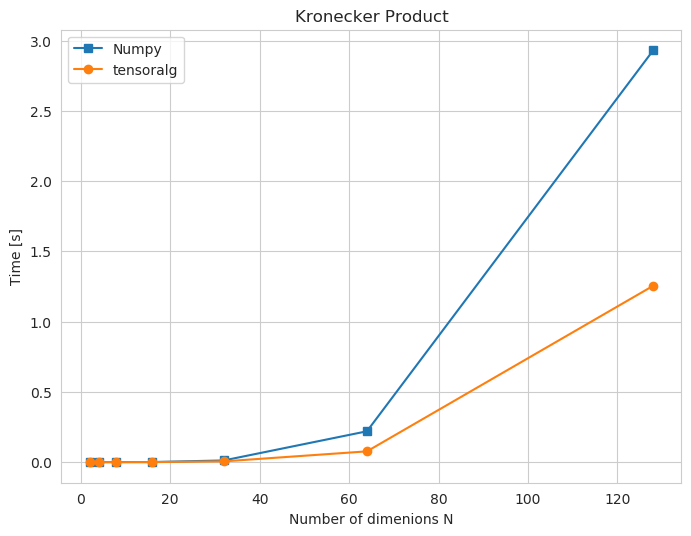

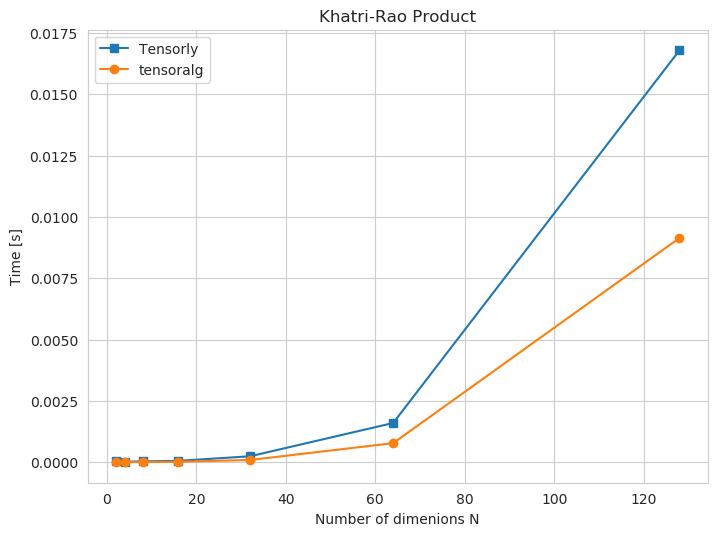

In [21]:
# Plots:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.plot(n, dt_hadamard.mean(axis=0)*1e-9, '-s', label='Numpy')
ax.plot(n, dt_my_hadamard.mean(axis=0)*1e-9, '-o', label='tensoralg')
ax.set_xlabel('Number of dimenions N')
ax.set_ylabel('Time [s]')
ax.set_title('Hadamard Product')
ax.legend()
plt.savefig('reports/figs/hadm.pdf')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.plot(n, dt_kron.mean(axis=0)*1e-9, '-s', label='Numpy')
ax.plot(n, dt_my_kron.mean(axis=0)*1e-9, '-o', label='tensoralg')
ax.set_xlabel('Number of dimenions N')
ax.set_ylabel('Time [s]')
ax.set_title('Kronecker Product')
ax.legend()
plt.savefig('reports/figs/kron.pdf')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.plot(n, dt_khatri.mean(axis=0)*1e-9, '-s', label='Tensorly')
ax.plot(n, dt_my_khatri.mean(axis=0)*1e-9, '-o', label='tensoralg')
ax.set_xlabel('Number of dimenions N')
ax.set_ylabel('Time [s]')
ax.set_title('Khatri-Rao Product')
ax.legend()
plt.savefig('reports/figs/krao.pdf')
plt.show()